# Boston House Price Estimation Project 
<br>
<font size="3">
    
- **Overview:** In this project we are going to build a machine learning model using *Linear Regression* which will eventually help us to predict the price of the house given explanatory variables that cover many aspects of residential houses such as size, no. of bedrooms, age etc.


- **Dataset Used:**  Boston Dataset available on sklearn.datasets


- **Aim:** Building a regression model which can give us a good prediction on the price of the house based on given features.
</font>

# Table of Contents
- [ 1 - Understand the problem statement ](#1)
- [ 2 - About the data used ](#2)
- [ 3 - Algorithm used](#3)
- [ 4 - Data Collection](#4)
- [ 5 - Data Preprocessing](#5)
- [ 6 - Exploratory Data Analysis(EDA)](#6)
- [ 7 - Feature Observation](#7)
- [ 8 - Feature Selection](#8)
- [ 9 - Model Building](#9)
- [ 10 - Model Performances](#10)
- [ 11 - Prediction and Final Score](#11)
- [ 12 - Output](#12)

## Understanding the problem:
<br>

What is the first thing we look out for while buying a house? Price right!!!. Everything else comes next. But the interesting part is what influences the price of a house. Most of the time it isn't just one specific feature rather a multiple factors like location, size, age, crime rate in town, AQI, etc. Therefore it wouldn't be wisest move to estimate the price of a house based on just one or two feature. But what if I say we can build a model based on previous records which can best predict the price of the house when provided some features. Cool right!, that is exactly what we are going to do this project.

## Dataset used:
<br>

For building a prediction model, the very first thing we need is data, to train and test the model. **No data means No model**. Now you guys must be wondering, where will we get the data for our model. 

We are going to use Boston House data available on sklearn.datasets as well as kaggle. The dataset used in this project comes from the UCI Machine Learning Repository. This data was collected in 1978 and each of the 506 entries represents aggregate information about 14 features of homes from various suburbs located in Boston.

- Features available on the data can be summarized as follows:
    - 1. **CRIM** per capital crime rate by town

    - 2. **ZN** proportion of residential land zoned for lots over 25,000 sq.ft.

    - 3. **INDUS** proportion of non-retail business acres per town

    - 4. **CHAS** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

    - 5. **NOX** nitric oxides concentration (parts per 10 million)

    - 6. **RM** average number of rooms per dwelling

    - 7. **AGE** proportion of owner-occupied units built prior to 1940

    - 8. **DIS** weighted distances to five Boston employment centers

    - 9. **RAD** index of accessibility to radial highways

    - 10. **TAX** full-value property-tax rate per 10,000 USD

    - 11. **PTRATIO** pupil-teacher ratio by town

    - 12. **Black** 1000(Bk — 0.63)² where Bk is the proportion of blacks by town

    - 13. **LSTAT** % lower status of the population
    
    - 14. **MEDV**  This is the median value of owner-occupied homes in $1000.

## Algorithm Used:

Linear Regression algorithm is implemented on the Boston house dataset. Python Libraries used are:

- **sklearn:** For linear regression model and to fetch the dataset.
- **numpy:**  To perform operations on the data
- **pandas:** To work with the data efficiently
- **matplotlib:** For visualizing the data and the result.

## Data collection:

Let's import all the required python libraries and the dataset.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math
from sklearn.datasets import load_boston
import seaborn as sns
import pandas as pd

In [2]:
#loading the data
boston = load_boston()

/home/arcane3301/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housi

In [3]:
#data = np.array(boston.data)
#print(type(boston))
#converting the data into pandas DF
df = pd.DataFrame(boston.data)

In [4]:
# Let's look first few enteries in the dataset to understand what kind of data is present.
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**NOTE:** We can see the columns do not have labels in the above table, so using it as it is will not give a good sense of which column represents which feature and hence create problem in feature selection. So our next step would be preprocessing.

## Data Preprocessing:

For machine learning algorithms to work, it’s necessary to convert raw data into a clean data set, which means we must convert the data set to numeric data. 

There are 4 main important steps for the preprocessing of data.

- Splitting of the data set in Training and Validation sets
- Taking care of Missing values
- Taking care of Categorical Features
- Normalization of data set


We saw in the previous step that the columns are missing feature labels. So let's try to assign labels to the columns.

In [5]:
#Various data present in the boston dataset
print(boston.keys())

print()
#Features name coressponding to each column
print("Feature names:", boston.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

Feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


As we can see boston has a different list of feature_names which contains names of all the features present in dataset.

Let's extract this list and add it to the dataframe as column label.

In [6]:
#extracting the feature_names
feature_names = boston.feature_names

#add the extracted list as feature label
df.columns = feature_names

#updated dataframe with name of the features
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Extracting the target variable:

We also need a `target variable` (i.e the actual price of the house) which we can use to train & test our model by comparing the predicted value with it.

Since we don't already have this variable in our DataFrame, let's extract it from the original dataset and add it to our dataframe.

In [7]:
#extracting the target variable and adding it to the dataframe
df["Price"] = boston.target

#updated dataframe with the price column
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


As you can see a new column has been appended at the end of the table. Later we will break the above table into two to implement our Linear Regression model.

Now we have all the required data we need, our first step data extraction is almost completed.

Let's use some generic functions to get a better insight about the data.

## Check for missing values

It's very important to deal with the missing values present in the dataset otherwise our model will not work as expected.  Missing values, or NaNs (not a number) in the data set is an annoying problem. You have to either drop the missing rows or fill them up with a mean or interpolated values.

In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

## Spliting target variable and independent variables

Currently both the target and independent variables are in the same DF. We have to keep them in separate dataFrame as independent variables will be used to generate predicted value and target variable is used for performance evaluation of the model.

In [9]:
# Explanatory variable
input_data = df.drop("Price", axis = 1)

# Target variable
target_data = pd.DataFrame(df["Price"])

In [10]:
input_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
target_data.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


As we can see there are no missing values in the data we are good to go.

## EDA (Exploratory data analysis)

Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

In [12]:
#shape of the data i.e dimensions (number of examples, number of features)
input_data.shape

(506, 13)

In [13]:
print("Boston housing dataset has {} data points with {} variables each.".format(*input_data.shape))

Boston housing dataset has 506 data points with 13 variables each.


### Observation:
This means there are 506 entries for each of the 13 features in this data.

In [14]:
#information about the training dataset 
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


One important thing to notice from above result is that we see the datatype of all the features is a numeric value.

Let's now take a look at some statistical information in the data.

In [15]:
input_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [16]:
# Identifying the unique number of values in the dataset
input_data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

In [17]:
# Minimum price of the data
minimum_price = min(target_data["Price"])

# Maximum price of the data
maximum_price = max(target_data["Price"])

# Mean price of the data
mean_price = target_data["Price"].mean()

# Median price of the data
median_price = target_data["Price"].median()

# Standard deviation of prices of the data
std_price = target_data["Price"].std()

# Show the calculated statistics
print("Statistics for Boston housing dataset (everything in $1000):\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset (everything in $1000):

Minimum price: $5.0
Maximum price: $50.0
Mean price: $22.532806324110698
Median price $21.2
Standard deviation of prices: $9.19710408737982


## Feature selection

Increasing the number of features would help the model to have a good prediction power, but only until a certain point. Increasing number of features after a certain point doesn't improve the model performance rather detoriate it. In this dataset we have 13 features and not all of them would have the equal influence on the price.

Therefore we have to remove the irrelevant features and keep only those which are relevant to for price prediction. We are going to use **Univariate Feature Selection method with SelectKBest** for selecting the best features and take the help of **sklearn library** to implement it.

In [18]:
# Lets try to understand which are important feature for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

target_data = np.round(df['Price'])
#Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)

fit = bestfeatures.fit(input_data,target_data)

dfscores = pd.DataFrame(fit.scores_)
#dfscores.head()

dfcolumns = pd.DataFrame(input_data.columns)
#dfcolumns.head()

# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ["Features","Score"] #naming the dataframe columns
featureScores

,Features,Score
0,CRIM,5503.817133
1,ZN,5937.859414
2,INDUS,873.746270
3,CHAS,59.080170
4,NOX,5.073299
5,RM,21.981504
6,AGE,2424.308937
7,DIS,163.919426
8,RAD,1445.257647
9,TAX,14817.836927


### Observation:

From above results we can conclude which feature is better based on the score of the feature. Then select first few best features and drop the rest.

In [31]:
##print 5 best features
print(featureScores.nlargest(5,"Score"))

   Features         Score
9       TAX  14817.836927
1        ZN   5937.859414
0      CRIM   5503.817133
11        B   3340.486412
6       AGE   2424.308937


In [32]:
input_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now since we know what top 5 features which are most relevant to the data. Let's remove the other features.

In [40]:
features = list(input_data.columns)
best_features = list(featureScores.nlargest(5,"Score")["Features"])

#dropping the irrelavant features
input_data = input_data.drop([x for x in features if x not in best_features], axis = 1)

In [39]:
input_data.head()

,CRIM,ZN,AGE,TAX,B
0,0.00632,18.0,65.2,296.0,396.90
1,0.02731,0.0,78.9,242.0,396.90
2,0.02729,0.0,61.1,242.0,392.83
3,0.03237,0.0,45.8,222.0,394.63
4,0.06905,0.0,54.2,222.0,396.90


In [41]:
# Finding out the correlation between the features
corr = input_data.corr()
corr.shape

(5, 5)

<AxesSubplot:>

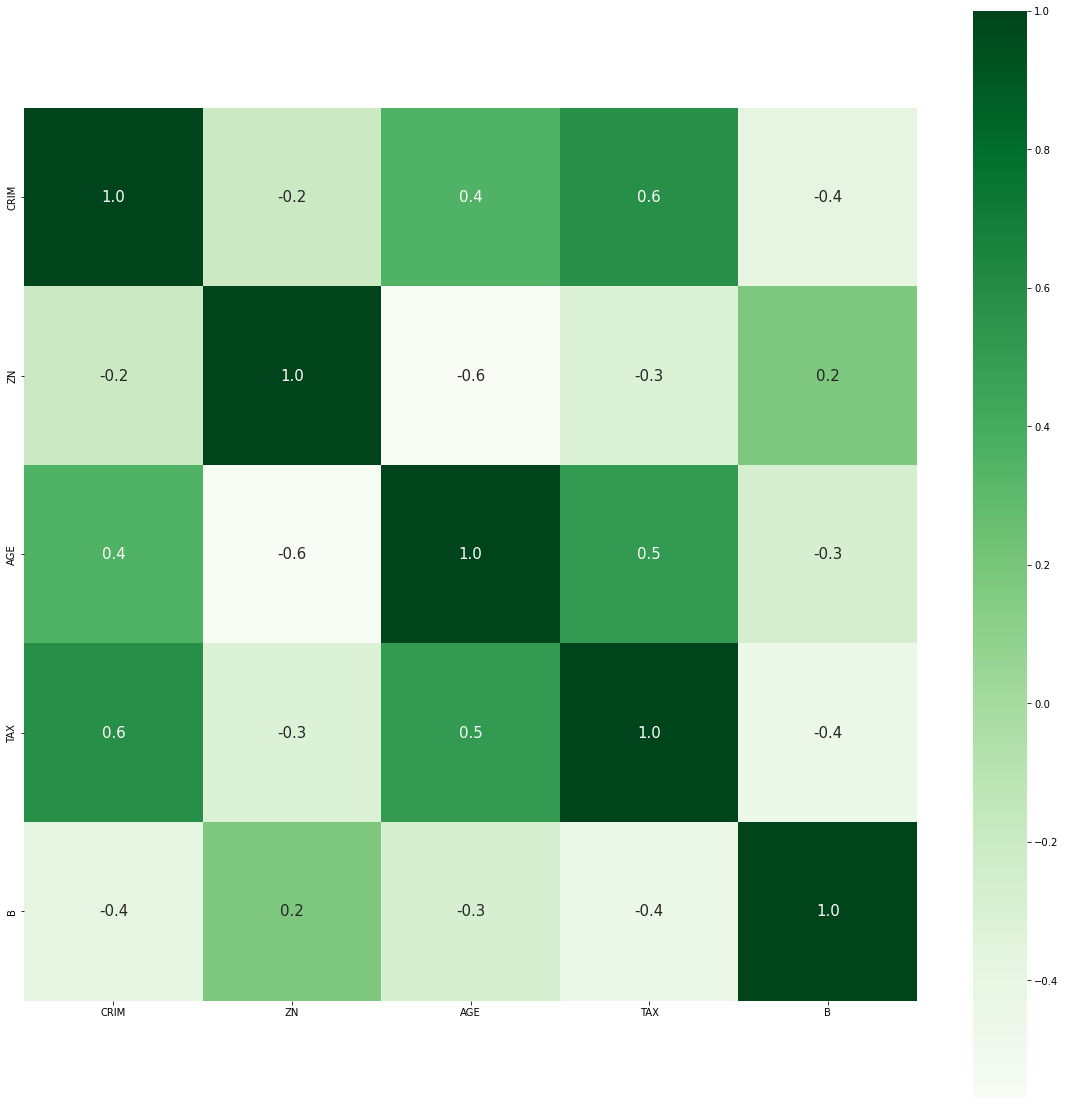

In [46]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')